# Exercise 4.10 - Coding Etiquette and Excel Reporting

## This script contains:
#### 01. Importing libraries
#### 02. Creating path to Instacart folder
#### 03. Importing data
#### 04. Checking data
#### 05. Addressing any PII (Personally Identifiable Information) data
#### 06. Creating a regional segmentation of the data
#### 07. Creating an exclusion flag for low-activity customers
#### 08. Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents
#### 09. Creating an appropriate visualization to show the distribution of profiles
#### 10. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### 11. Comparing customer profiles with regions and departments
#### 12. Producing suitable charts to illustrate results and exporting them in a project folder
#### 13. Further analasys to answer other project questions
#### 14. Exporting final data set

# 01. Importing libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Creating path to Instacart folder

In [2]:
# create path to Instacart folder

path = r'/Users/eastongorman/Library/CloudStorage/OneDrive-Personal/Data Analytics/06-2023 Instacart Basket Analysis'

In [3]:
# check path

path

'/Users/eastongorman/Library/CloudStorage/OneDrive-Personal/Data Analytics/06-2023 Instacart Basket Analysis'

# 03. Importing data

In [4]:
# import data

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
# create dataframe from imported data

df = ords_prods_cust

# 04. Checking data

In [6]:
# show first 5 rows of dataframe

df.head()

,user_id,first_name,last_name,sex,state,age,date_joined,#_dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [7]:
# dimensions of dataframe

df.shape

(32404859, 34)

In [8]:
# info of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                int64   
 1   first_name             object  
 2   last_name              object  
 3   sex                    object  
 4   state                  object  
 5   age                    int64   
 6   date_joined            object  
 7   #_dependants           int64   
 8   marital_status         object  
 9   income                 int64   
 10  order_id               int64   
 11  order_number           int64   
 12  orders_day_of_week     int64   
 13  order_hour_of_day      int64   
 14  days_since_last_order  float64 
 15  product_id             int64   
 16  add_to_cart_order      int64   
 17  reordered              int64   
 18  product_name           object  
 19  aisle_id               int64   
 20  department_id          int64   
 21  prices                 float6

# 05. Addressing any PII (Personally Identifiable Information) data

### First and last names of customers are included in the dataset, which is PII data. These columns could potentially be traced back to a particular person, so they will be deleted.

In [9]:
# drop PII data

df = df.drop(columns = ['first_name', 'last_name'])

In [10]:
# check shape of dataframe

df.shape

(32404859, 32)

In [11]:
# check if columns were deleted

df.columns

Index(['user_id', 'sex', 'state', 'age', 'date_joined', '#_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_orders', 'order_frequency_flag',
       '_merge'],
      dtype='object')

# 06. Creating a regional segmentation of the data

### Creating regional column

In [12]:
# create an empty list for 'region' column

region = []

In [13]:
# check the names of states in dataframe

df['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [14]:
# fill empty list with regions "Northeast", "Midwest", "South", and "West"

for value in df['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [15]:
# print region list

region

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 

In [16]:
# combine 'region' column with dataframe

df['region'] = region

In [17]:
# check frequency of 'region' column

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

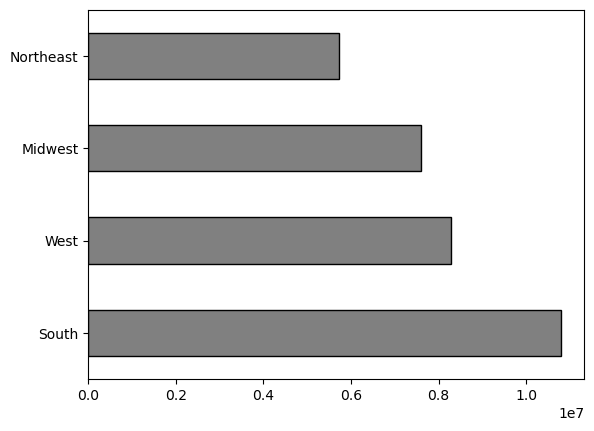

In [18]:
# create a bar chart of customers by region

bar = df['region'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')

In [19]:
# export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_by_region.png'))

In [20]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest


In [21]:
# check shape of dataframe

df.shape

(32404859, 33)

### Determine difference in spending habits between US regions

In [22]:
# create crosstab between 'region' and 'spending_flag' columns

crosstab_region_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [23]:
# check output

crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


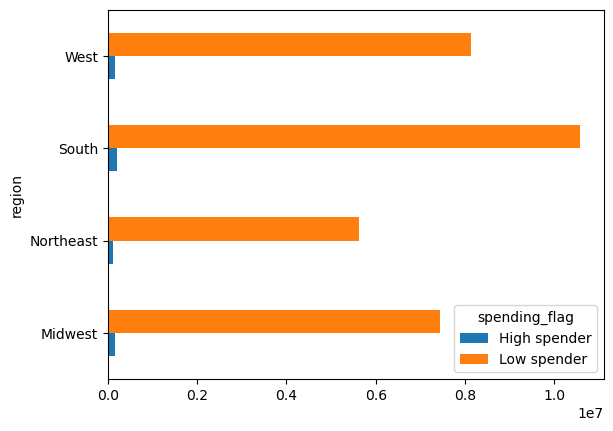

In [24]:
# create bar chart of spending by region

bar_2 = crosstab_region_spending.plot.barh()

In [25]:
# export bar chart

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spending_by_region.png'))

# 07. Creating an exclusion flag for low-activity customers

In [26]:
# create exclusion flag

df.loc[df['max_order'] < 5, 'low_order_flag'] = 'Low activity customer'

In [27]:
df.loc[df['max_order'] >= 5, 'low_order_flag'] = 'High activity customer'

In [28]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,low_order_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer


In [29]:
# check shape of dataframe

df.shape

(32404859, 34)

In [30]:
# check frequency of 'low_order_flag' column

df['low_order_flag'].value_counts(dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: low_order_flag, dtype: int64

In [31]:
# create sample of only high_activity_customers

df_high_activity_customers = df[df['low_order_flag'] == 'High activity customer']

In [32]:
# export dataframe

df_high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_high_activity.pkl'))

# 08. Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

### Age

In [33]:
# create 'age_profile' column

df.loc[df['age'] < 13, 'age_profile'] = 'Child'

In [34]:
df.loc[(df['age'] >= 13) & (df['age'] <= 17), 'age_profile'] = 'Adolescent'

In [35]:
df.loc[(df['age'] > 17) & (df['age'] <= 35), 'age_profile'] = 'Young Adult'

In [36]:
df.loc[(df['age'] > 35) & (df['age'] <= 65), 'age_profile'] = 'Adult'

In [37]:
df.loc[df['age'] > 65, 'age_profile'] = 'Elder'

In [38]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,low_order_flag,age_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult


In [39]:
# check shape of dataframe

df.shape

(32404859, 35)

In [40]:
# check frequency of 'age_profile' column

df['age_profile'].value_counts(dropna = False)

Adult          15170339
Young Adult     9146419
Elder           8088101
Name: age_profile, dtype: int64

### Income

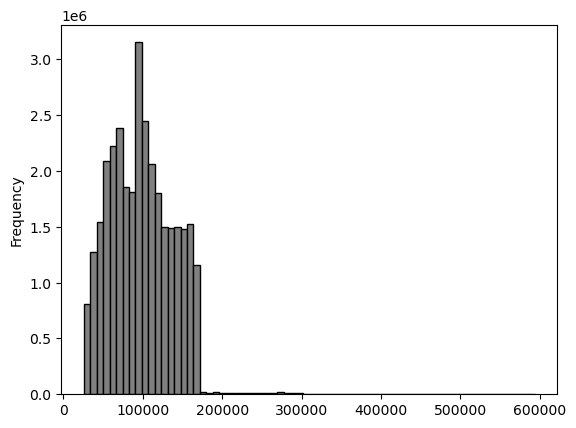

In [41]:
# create histogram of customer income

hist = df['income'].plot.hist(bins = 70, color = ['grey'], ec = 'black')

In [42]:
# create 'income_profile' column

df.loc[df['income'] < 75000, 'income_profile'] = 'Low income'

In [43]:
df.loc[(df['income'] >= 75000) & (df['income'] < 125000), 'income_profile'] = 'Middle income'

In [44]:
df.loc[(df['income'] >= 125000) & (df['income'] < 175000), 'income_profile'] = 'High income'

In [45]:
df.loc[df['income'] >= 175000, 'income_profile'] = 'Very high income'

In [46]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,low_order_flag,age_profile,income_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income


In [47]:
# check shape of dataframe

df.shape

(32404859, 36)

In [48]:
# check frequency of 'income_profile' column

df['income_profile'].value_counts(dropna = False)

Middle income       13331136
Low income          10442766
High income          8323613
Very high income      307344
Name: income_profile, dtype: int64

### Department

### Vegan / Non-vegan
    A crosstab will be created using the 'department_id' column.
    Vegans don't eat meat/seafood and dairy/eggs (department_id = 12 and department_id = 16).

In [49]:
# create crosstab between 'department_id' and 'user_id' columns

crosstab_department_user = pd.crosstab(df['department_id'], df['user_id'], dropna = False)

In [50]:
# assign nutrition flags to users and store them in a Python dictionary

vegan_dict = dict()
for user in crosstab_department_user:
    workinglist = crosstab_department_user[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:  # the index starts at 0, so index corresponds to dep_id = 1
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [51]:
# assign user flags to the vegan_flag

vegan_flag = []
for user in df['user_id']:
    vegan_flag.append(vegan_dict[user])

In [52]:
# add vegan_flag to dataframe as 'vegan_profile' column

df['vegan_profile'] = vegan_flag

In [53]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,low_order_flag,age_profile,income_profile,vegan_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,7.988889,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan


In [54]:
# check shape of dataframe

df.shape

(32404859, 37)

In [55]:
# check frequency of 'vegan_profile' column

df['vegan_profile'].value_counts(dropna = False)

Non-vegan    32021432
Vegan          383427
Name: vegan_profile, dtype: int64

### Pet owners / Non-pet owners
    The 'department_id' column (deprtment_id = 8) will be used to determine customers with pets and customers with no pets.

In [56]:
# assign pet flags to users and store them in a Python dictionary

pet_dict = dict()
for user in crosstab_department_user:
    workinglist = crosstab_department_user[user].tolist()
    if workinglist[7] == 0:  # the index starts at 0, so index corresponds to dep_id = 1
        pet_dict[user] = 'No pet'
    else:
        pet_dict[user] = 'Pet owner'

In [57]:
# assign user flags to the pet_flag

pet_flag = []
for user in df['user_id']:
    pet_flag.append(pet_dict[user])

In [58]:
# add pet_flag to dataframe as 'pet_profile' column

df['pet_profile'] = pet_flag

In [59]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,low_order_flag,age_profile,income_profile,vegan_profile,pet_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Low spender,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet


In [60]:
# check shape of dataframe

df.shape

(32404859, 38)

In [61]:
# check frequency of 'pet_profile' column

df['pet_profile'].value_counts(dropna = False)

No pet       28876718
Pet owner     3528141
Name: pet_profile, dtype: int64

### New parent / Non-new parent
    The 'department_id' column (deprtment_id = 18) will be used to determine new parents and non-new parents.

In [62]:
# assign new parent flags to users and store them in a Python dictionary

new_parent_dict = dict()
for user in crosstab_department_user:
    workinglist = crosstab_department_user[user].tolist()
    if workinglist[17] == 0:  # the index starts at 0, so index corresponds to dep_id = 1
        new_parent_dict[user] = 'Non-new parent'
    else:
        new_parent_dict[user] = 'New parent'

In [63]:
# assign user flags to the new_parent_flag

new_parent_flag = []
for user in df['user_id']:
    new_parent_flag.append(new_parent_dict[user])

In [64]:
# add new_parent_flag to dataframe as new_parent_profile

df['new_parent_profile'] = new_parent_flag

In [65]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,median_prior_orders,order_frequency_flag,_merge,region,low_order_flag,age_profile,income_profile,vegan_profile,pet_profile,new_parent_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,19.0,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent


In [66]:
# check shape of dataframe

df.shape

(32404859, 39)

In [67]:
# check frequency of 'new_parent_profile' column

df['new_parent_profile'].value_counts(dropna = False)

Non-new parent    22431550
New parent         9973309
Name: new_parent_profile, dtype: int64

### Family status

In [68]:
# check frequency for 'marital_status' column

df['marital_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

In [69]:
# create crosstab between '#_dependants' and 'marital_status' columns

crosstab_family = pd.crosstab(df['marital_status'], df['#_dependants'], dropna = False)

In [70]:
# check output

crosstab_family

#_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


### To create family profile, the above information will be combined as follows:
    Married with dependents: marital_status = married and #_dependents >= 1
    Single with dependents: marital_status = single, living with parents and siblings, divorced/widowed and #_dependents >= 1
    Single without dependents: marital_status = single, divorced/widowed and #_dependents = 0

In [71]:
# create 'family_profile' column

df.loc[(df['marital_status'] == 'married') & (df['#_dependants'] >= 1), 'family_profile'] = 'Married with dependants'

In [72]:
df.loc[(df['marital_status'] != 'married') & (df['#_dependants'] >= 1), 'family_profile'] = 'Single with dependants'

In [73]:
df.loc[(df['marital_status'] != 'married') & (df['#_dependants'] == 0), 'family_profile'] = 'Single without dependants'

In [74]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,order_frequency_flag,_merge,region,low_order_flag,age_profile,income_profile,vegan_profile,pet_profile,new_parent_profile,family_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regular customer,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants


In [75]:
# check shape of dataframe

df.shape

(32404859, 40)

In [76]:
# check frequency of 'family_profile' column

df['family_profile'].value_counts(dropna = False)

Married with dependants      22756753
Single without dependants     8097503
Single with dependants        1550603
Name: family_profile, dtype: int64

### Shopping tendencies by 'orders_day_of_week' and 'age_profile' columns

In [77]:
# create crosstab between 'age_profile' and 'orders_day_of_week' columns

crosstab_shopping_dow_age = pd.crosstab(df['age_profile'], df['orders_day_of_week'], dropna = False)

In [78]:
# check output

crosstab_shopping_dow_age

orders_day_of_week,0,1,2,3,4,5,6
age_profile,,,,,,,
Adult,2899877,2644868,1981600,1799689,1772186,1967236,2104883
Elder,1549208,1398511,1050844,963126,939259,1053087,1134066
Young Adult,1755097,1616851,1181386,1077719,1072357,1185468,1257541


### To create shopping profile, the above information will be combined as follows:
    Adult, weekend shopper: age_profile = Adult and orders_day_of_week <= 1
    Adult, weekday shopper: age_profile = Adult and orders_day_of_week > 1
    Elder, weekend shopper: age_profile = Elder and orders_day_of_week <= 1
    Elder, weekday shopper: age_profile = Elder and orders_day_of_week > 1
    Young adult, weekend shopper: age_profile = Young adult and orders_day_of_week <= 1
    Young adult, weekday shopper: age_profile = Young adult and orders_day_of_week > 1

In [79]:
# create the 'shopping_profile' column

df.loc[(df['age_profile'] == 'Adult') & (df['orders_day_of_week'] <= 1), 'shopping_profile'] = 'Adult, weekend shopper'

In [80]:
df.loc[(df['age_profile'] == 'Adult') & (df['orders_day_of_week'] > 1), 'shopping_profile'] = 'Adult, weekday shopper'

In [81]:
df.loc[(df['age_profile'] == 'Elder') & (df['orders_day_of_week'] <= 1), 'shopping_profile'] = 'Elder, weekend shopper'

In [82]:
df.loc[(df['age_profile'] == 'Elder') & (df['orders_day_of_week'] > 1), 'shopping_profile'] = 'Elder, working-day shopper'

In [83]:
df.loc[(df['age_profile'] == 'Young Adult') & (df['orders_day_of_week'] <= 1), 'shopping_profile'] = 'Young adult, weekend shopper'

In [84]:
df.loc[(df['age_profile'] == 'Young Adult') & (df['orders_day_of_week'] > 1), 'shopping_profile'] = 'Young adult, working-day shopper'

In [85]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,_merge,region,low_order_flag,age_profile,income_profile,vegan_profile,pet_profile,new_parent_profile,family_profile,shopping_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekend shopper"
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekday shopper"
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekend shopper"
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekday shopper"
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,both,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekday shopper"


In [86]:
# check shape of dataframe

df.shape

(32404859, 41)

In [87]:
# check frequency of 'shopping_profile' column

df['shopping_profile'].value_counts(dropna = False)

Adult, weekday shopper              9625594
Young adult, working-day shopper    5774471
Adult, weekend shopper              5544745
Elder, working-day shopper          5140382
Young adult, weekend shopper        3371948
Elder, weekend shopper              2947719
Name: shopping_profile, dtype: int64

### Shopping tendencies by 'order_day_of_week' and 'family_profile' columns

In [88]:
# create crosstab between 'family_profile' and 'orders_day_of_week' columns

crosstab_shopping_dow_family = pd.crosstab(df['family_profile'], df['orders_day_of_week'], dropna = False)

In [89]:
# check output

crosstab_shopping_dow_family

orders_day_of_week,0,1,2,3,4,5,6
family_profile,,,,,,,
Married with dependants,4358649,3964070,2963190,2698866,2657803,2945443,3168732
Single with dependants,295224,271393,201511,182315,180794,203203,216163
Single without dependants,1550309,1424767,1049129,959353,945205,1057145,1111595


### To create the family_shopping profile, the above information will be combined as follows:
    Married with dependents, weekend shopper: family_profile = Married, with dependents and Orders_day_of_Week <= 1
    Married with dependents, weekday shopper: family_profile = Married, with dependents and Orders_day_of_Week > 1
    Single without dependents, weekend shopper: family_profile = Single, no dependents and Orders_day_of_Week <= 1
    Single without dependents, weekday shopper: family_profile = Single, no dependents and Orders_day_of_Week > 1
    Single with dependents, weekend shopper: family_profile = Single, with dependents and Orders_day_of_Week <= 1
    Single with dependents, weekday shopper: family_profile = Single, with dependents and Orders_day_of_Week > 1

In [90]:
# create the 'family_shopping_profile' column

df.loc[(df['family_profile'] == 'Single without dependants') & (df['orders_day_of_week'] <= 1), 'family_shopping_profile'] = 'Single without dependents, weekend shopper'

In [91]:
df.loc[(df['family_profile'] == 'Single without dependants') & (df['orders_day_of_week'] > 1), 'family_shopping_profile'] = 'Single without dependents, weekday shopper'

In [92]:
df.loc[(df['family_profile'] == 'Married with dependants') & (df['orders_day_of_week'] <= 1), 'family_shopping_profile'] = 'Married with dependents, weekend shopper'

In [93]:
df.loc[(df['family_profile'] == 'Married with dependants') & (df['orders_day_of_week'] > 1), 'family_shopping_profile'] = 'Married with dependents, weekday shopper'

In [94]:
df.loc[(df['family_profile'] == 'Single with dependants') & (df['orders_day_of_week'] <= 1), 'family_shopping_profile'] = 'Single with dependents, weekend shopper'

In [95]:
df.loc[(df['family_profile'] == 'Single with dependants') & (df['orders_day_of_week'] > 1), 'family_shopping_profile'] = 'Single with dependents, weekday shopper'

In [96]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,region,low_order_flag,age_profile,income_profile,vegan_profile,pet_profile,new_parent_profile,family_profile,shopping_profile,family_shopping_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekend shopper","Married with dependents, weekend shopper"
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekday shopper","Married with dependents, weekday shopper"
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekend shopper","Married with dependents, weekend shopper"
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekday shopper","Married with dependents, weekday shopper"
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Midwest,High activity customer,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekday shopper","Married with dependents, weekday shopper"


In [97]:
# check shape of dataframe

df.shape

(32404859, 42)

In [98]:
# check frequency of 'family_shopping_profile' column

df['family_shopping_profile'].value_counts(dropna = False)

Married with dependents, weekday shopper      14434034
Married with dependents, weekend shopper       8322719
Single without dependents, weekday shopper     5122427
Single without dependents, weekend shopper     2975076
Single with dependents, weekday shopper         983986
Single with dependents, weekend shopper         566617
Name: family_shopping_profile, dtype: int64

### Shopping tendencies by 'parts_of_day' and 'age_profile' columns

In [99]:
# create 'parts_of_day' column

df.loc[df['order_hour_of_day'] < 12, 'parts_of_day'] = 'Morning'

In [100]:
df.loc[(df['order_hour_of_day'] >= 12) & (df['order_hour_of_day'] <= 17), 'parts_of_day'] = 'Afternoon'

In [101]:
df.loc[df['order_hour_of_day'] > 17, 'parts_of_day'] = 'Night'

In [102]:
# create crosstab between 'age_profile' and 'order_hour_of_day' columns

crosstab_shopping_age_hour = pd.crosstab(df['age_profile'], df['parts_of_day'], dropna = False)

In [103]:
# check output

crosstab_shopping_age_hour

parts_of_day,Afternoon,Morning,Night
age_profile,,,
Adult,7156836,5336730,2676773
Elder,3796000,2863057,1429044
Young Adult,4300786,3248309,1597324


### To create the hourly_shopping_profile, the above information will be combined as follows:
    Adult, morning shopper: age_profile = Adult and parts_of_day = Morning
    Adult, afternoon shopper: age_profile = Adult and parts_of_day = Afternoon
    Adult, night shopper: age_profile = Adult and parts_of_day = Night
    Elder, morning shopper: age_profile = Adult and parts_of_day = Morning
    Elder, afternoon shopper: age_profile = Adult and parts_of_day = Afternoon
    Elder, night shopper: age_profile = Adult and parts_of_day = Night
    Young Adult, morning shopper: age_profile = Young Adult and parts_of_day = Morning
    Young Adult, afternoon shopper: age_profile = Young Adult and parts_of_day = Afternoon
    Young Adult, night shopper: age_profile = Young Adult and parts_of_day = Night

In [104]:
# create the 'hourly_shopping_profile' column

df.loc[(df['age_profile'] == 'Adult') & (df['parts_of_day'] == 'Morning'), 'hourly_shopping_profile'] = 'Adult, morning shopper'

In [105]:
df.loc[(df['age_profile'] == 'Adult') & (df['parts_of_day'] == 'Afternoon'), 'hourly_shopping_profile'] = 'Adult, afternoon shopper'

In [106]:
df.loc[(df['age_profile'] == 'Adult') & (df['parts_of_day'] == 'Night'), 'hourly_shopping_profile'] = 'Adult, night shopper'

In [107]:
df.loc[(df['age_profile'] == 'Elder') & (df['parts_of_day'] == 'Morning'), 'hourly_shopping_profile'] = 'Elder, morning shopper'

In [108]:
df.loc[(df['age_profile'] == 'Elder') & (df['parts_of_day'] == 'Afternoon'), 'hourly_shopping_profile'] = 'Elder, afternoon shopper'

In [109]:
df.loc[(df['age_profile'] == 'Elder') & (df['parts_of_day'] == 'Night'), 'hourly_shopping_profile'] = 'Elder, night shopper'

In [110]:
df.loc[(df['age_profile'] == 'Young Adult') & (df['parts_of_day'] == 'Morning'), 'hourly_shopping_profile'] = 'Young adult, morning shopper'

In [111]:
df.loc[(df['age_profile'] == 'Young Adult') & (df['parts_of_day'] == 'Afternoon'), 'hourly_shopping_profile'] = 'Young adult, afternoon shopper'

In [112]:
df.loc[(df['age_profile'] == 'Young Adult') & (df['parts_of_day'] == 'Night'), 'hourly_shopping_profile'] = 'Young adult, night shopper'

In [113]:
# show first 5 rows of dataframe

df.head()

,user_id,sex,state,age,date_joined,#_dependants,marital_status,income,order_id,order_number,...,age_profile,income_profile,vegan_profile,pet_profile,new_parent_profile,family_profile,shopping_profile,family_shopping_profile,parts_of_day,hourly_shopping_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekend shopper","Married with dependents, weekend shopper",Morning,"Adult, morning shopper"
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekday shopper","Married with dependents, weekday shopper",Afternoon,"Adult, afternoon shopper"
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekend shopper","Married with dependents, weekend shopper",Afternoon,"Adult, afternoon shopper"
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekday shopper","Married with dependents, weekday shopper",Morning,"Adult, morning shopper"
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Adult,High income,Non-vegan,No pet,Non-new parent,Married with dependants,"Adult, weekday shopper","Married with dependents, weekday shopper",Morning,"Adult, morning shopper"


In [114]:
# check shape of dataframe

df.shape

(32404859, 44)

In [115]:
# check frequency of 'hourly_shopping_profile' column

df['hourly_shopping_profile'].value_counts(dropna = False)

Adult, afternoon shopper          7156836
Adult, morning shopper            5336730
Young adult, afternoon shopper    4300786
Elder, afternoon shopper          3796000
Young adult, morning shopper      3248309
Elder, morning shopper            2863057
Adult, night shopper              2676773
Young adult, night shopper        1597324
Elder, night shopper              1429044
Name: hourly_shopping_profile, dtype: int64

# 09. Creating an appropriate visualization to show the distribution of profiles

### Age

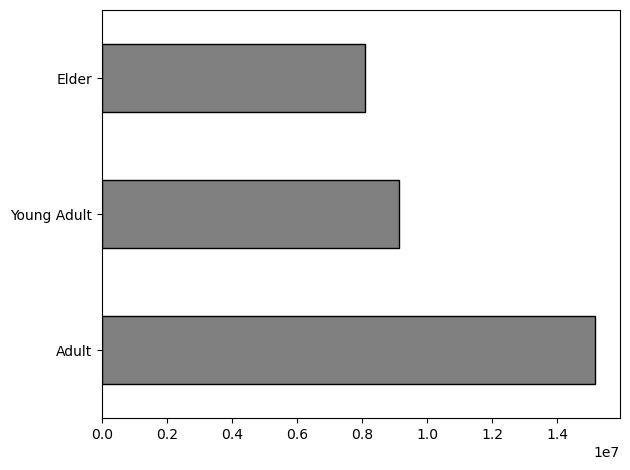

In [116]:
# age_profile bar chart

age_profile_bar = df['age_profile'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [117]:
# export the age_profile_bar

age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

### Income

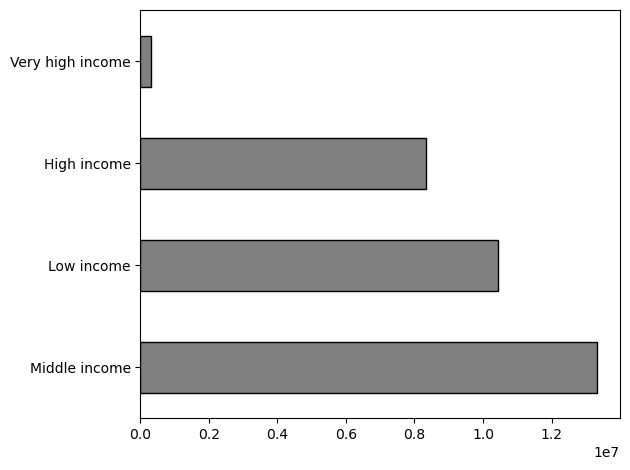

In [118]:
# income_profile

income_profile_bar = df['income_profile'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [119]:
# export the income_profile_bar

income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

### Department

### Vegans / Non-vegans

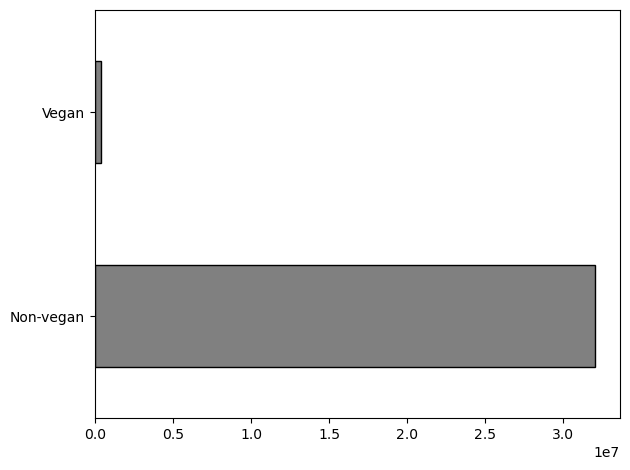

In [120]:
# vegan_profile

vegan_profile_bar = df['vegan_profile'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [121]:
# export the vegan_profile_bar

vegan_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_profile_bar.png'))

### Pet owners / Non-pet owners

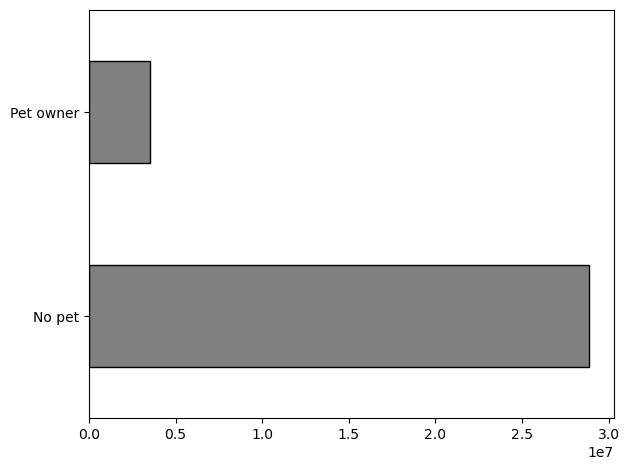

In [122]:
# pet_profile

pet_profile_bar = df['pet_profile'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [123]:
# export the pet_profile_bar

pet_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_profile_bar.png'))

### New parent / Non-new parent

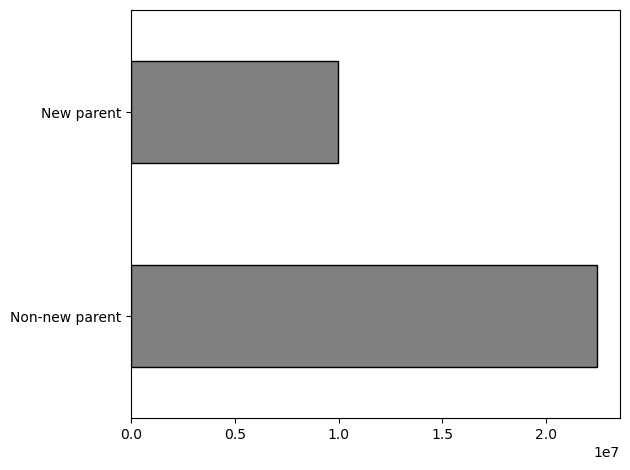

In [124]:
# new_parent_profile

new_parent_profile_bar = df['new_parent_profile'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [125]:
# export the new_parent_profile_bar

new_parent_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_parent_profile_bar.png'))

### Family status

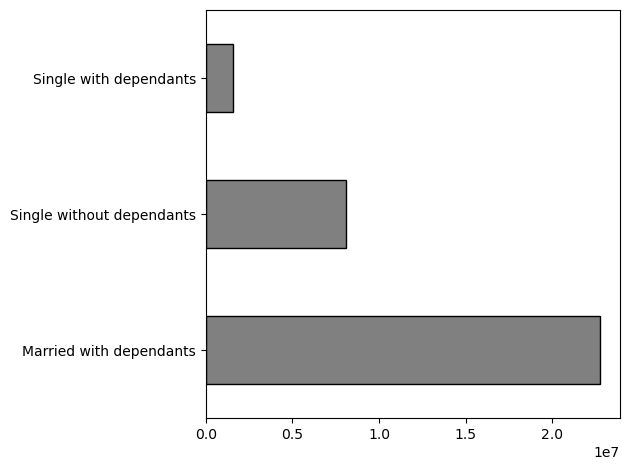

In [126]:
# family_profile

family_profile_bar = df['family_profile'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [127]:
# export the family_profile_bar

family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

### Shopping tendencies by day of week and age group

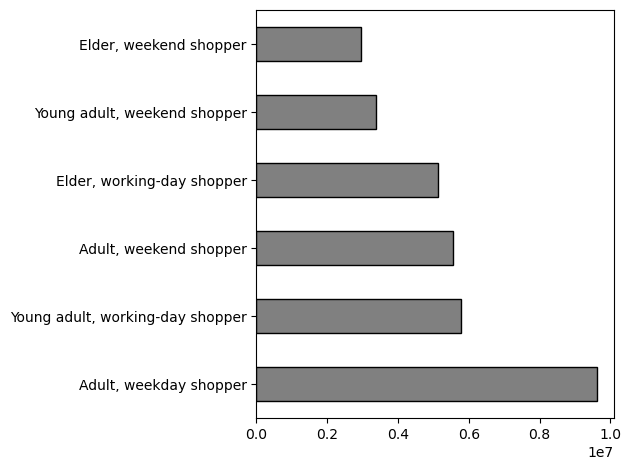

In [128]:
# shopping_profile

shopping_profile_bar = df['shopping_profile'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [129]:
# export the shopping_profile_bar

shopping_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopping_profile_bar.png'))

### Shopping tendencies by day of week and family profile

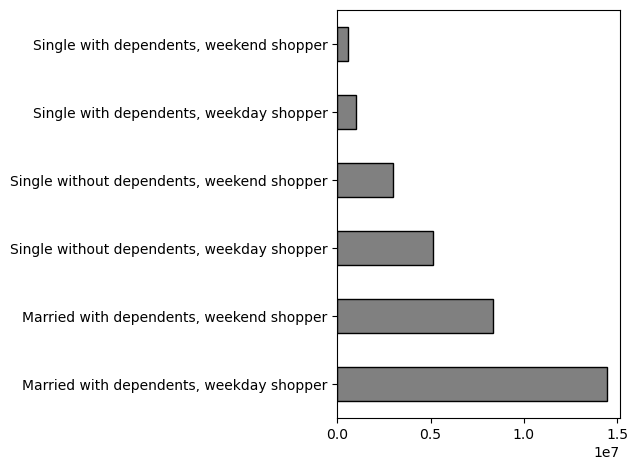

In [130]:
# family_shopping_profile

family_shopping_profile_bar = df['family_shopping_profile'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [131]:
# export the family_shopping_profile_bar

family_shopping_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_shopping_profile_bar.png'))

### Shopping tendencies by parts of day and age profile

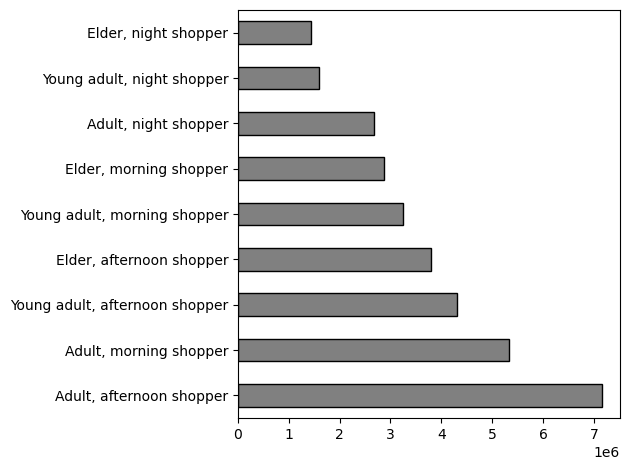

In [132]:
# hourly_shopping_profile

hourly_shopping_profile_bar = df['hourly_shopping_profile'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [133]:
# export the hourly_shopping_profile_bar

hourly_shopping_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_shopping_profile_bar.png'))

# 10. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

## Age

In [134]:
# age_profile stats

df.groupby('age_profile').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices                
                              min       mean   max    min      mean   max
age_profile                                                              
Adult                         0.0  11.103899  30.0    1.0  7.792799  25.0
Elder                         0.0  11.080922  30.0    1.0  7.794295  25.0
Young Adult                   0.0  11.124858  30.0    1.0  7.785081  25.0

### Usage frequency and expenditure are similar for all 3 age groups.

## Income

In [135]:
# income_profile stats

df.groupby('income_profile').agg({'days_since_last_order':['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices                
                                   min       mean   max    min      mean   max
income_profile                                                                
High income                        0.0  11.053444  30.0    1.0  7.963271  25.0
Low income                         0.0  11.240514  30.0    1.0  7.434729  25.0
Middle income                      0.0  11.049451  30.0    1.0  7.962545  25.0
Very high income                   0.0  10.241647  30.0    1.0  7.790316  25.0

### Usage frequency and expenditure are similar for all 4 income groups, but customers with a very high income shop more frequently.

## Department

### Vegans / Non-vegans

In [136]:
# vegan_profile stats

df.groupby('vegan_profile').agg({'days_since_last_order':['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices                
                                min       mean   max    min      mean   max
vegan_profile                                                              
Non-vegan                       0.0  11.063329  30.0    1.0  7.800348  25.0
Vegan                           0.0  14.749275  30.0    1.0  7.009920  20.0

### Non-vegan customers have a higher usage frequency and a slightly higher enxpenditure than vegan customers.

## Pet owners / Non-pet owners

In [137]:
# pet_profile stats

df.groupby('pet_profile').agg({'days_since_last_order':['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices                
                              min       mean   max    min      mean   max
pet_profile                                                              
No pet                        0.0  11.200417  30.0    1.0  7.788360  25.0
Pet owner                     0.0  10.327303  30.0    1.0  7.812556  25.0

### Customers with a pet have a higher usage frequency, but the expenditure is roughly the same for both groups.

## New parent / Non-new parent

In [138]:
# new_parent_profile stats

df.groupby('new_parent_profile').agg({'days_since_last_order':['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices            \
                                     min       mean   max    min      mean   
new_parent_profile                                                           
New parent                           0.0   9.479345  30.0    1.0  7.833025   
Non-new parent                       0.0  11.848432  30.0    1.0  7.772306   

                          
                     max  
new_parent_profile        
New parent          25.0  
Non-new parent      25.0

### Customers with young children (new parents) have a higher usage frequency, but the enpenditure is roughly the same for both groups.

## Family status

In [139]:
# family_profile stats

df.groupby('family_profile').agg({'days_since_last_order':['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices  \
                                            min       mean   max    min   
family_profile                                                            
Married with dependants                     0.0  11.116175  30.0    1.0   
Single with dependants                      0.0  11.048170  30.0    1.0   
Single without dependants                   0.0  11.080805  30.0    1.0   

                                           
                               mean   max  
family_profile                             
Married with dependants    7.790695  25.0  
Single with dependants     7.800712  25.0  
Single without dependants  7.789975  25.0

### Usage frequency and expenditure are similar across all 3 groups.

## Shopping tendencies by day of week and age group

In [140]:
# shopping_profile stats

df.groupby('shopping_profile').agg({'days_since_last_order':['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                   \
                                                   min       mean   max   
shopping_profile                                                          
Adult, weekday shopper                             0.0  10.908153  30.0   
Adult, weekend shopper                             0.0  11.444839  30.0   
Elder, weekend shopper                             0.0  11.465755  30.0   
Elder, working-day shopper                         0.0  10.860786  30.0   
Young adult, weekend shopper                       0.0  11.492431  30.0   
Young adult, working-day shopper                   0.0  10.910890  30.0   

                                 prices                  
                                    min      mean   max  
shopping_profile                                         
Adult, weekday shopper              1.0  7.781197  25.0  
Adult, weekend shopper              1.0  7.812940  25.0  
Elder, weekend shopper              1.0  7.812365  25.0  
Elder, working-day shopper          1.0  7.783933  25.0  
Young adult, weekend shopper        1.0  7.806222  25.0  
Young adult, working-day shopper    1.0  7.772736  25.0

### Expenditure is similar across all 6 groups, but adult-weekend, elder-weekend, and young adult-weekend have a lower usage frequency than weekdays.

## Shopping tendencies by day of week and family profile

In [141]:
# family_shopping stats

df.groupby('family_shopping_profile').agg({'days_since_last_order':['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order             \
                                                             min       mean   
family_shopping_profile                                                       
Married with dependents, weekday shopper                     0.0  10.913831   
Married with dependents, weekend shopper                     0.0  11.468237   
Single with dependents, weekday shopper                      0.0  10.797623   
Single with dependents, weekend shopper                      0.0  11.484070   
Single without dependents, weekday shopper                   0.0  10.868952   
Single without dependents, weekend shopper                   0.0  11.446581   

                                                 prices                  
                                             max    min      mean   max  
family_shopping_profile                                                  
Married with dependents, weekday shopper    30.0    1.0  7.778951  25.0  
Married with dependents, weekend shopper    30.0    1.0  7.811062  25.0  
Single with dependents, weekday shopper     30.0    1.0  7.788235  25.0  
Single with dependents, weekend shopper     30.0    1.0  7.822380  25.0  
Single without dependents, weekday shopper  30.0    1.0  7.779382  25.0  
Single without dependents, weekend shopper  30.0    1.0  7.808212  25.0

### Expenditure is similar across all groups, but weekday shoppers have a higher usage frequency than weekend shoppers. This closely resembles the shopping_profile stats even with dependents factored in.

## Shopping tendencies by parts of day and age profile

In [142]:
# hourly_shopping stats

df.groupby('hourly_shopping_profile').agg({'days_since_last_order':['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices  \
                                                 min       mean   max    min   
hourly_shopping_profile                                                        
Adult, afternoon shopper                         0.0  11.307416  30.0    1.0   
Adult, morning shopper                           0.0  10.906423  30.0    1.0   
Adult, night shopper                             0.0  10.955850  30.0    1.0   
Elder, afternoon shopper                         0.0  11.275062  30.0    1.0   
Elder, morning shopper                           0.0  10.898844  30.0    1.0   
Elder, night shopper                             0.0  10.932471  30.0    1.0   
Young adult, afternoon shopper                   0.0  11.305043  30.0    1.0   
Young adult, morning shopper                     0.0  10.925495  30.0    1.0   
Young adult, night shopper                       0.0  11.047656  30.0    1.0   

                                                
                                    mean   max  
hourly_shopping_profile                         
Adult, afternoon shopper        7.800388  25.0  
Adult, morning shopper          7.775301  25.0  
Adult, night shopper            7.807395  25.0  
Elder, afternoon shopper        7.808587  25.0  
Elder, morning shopper          7.773115  25.0  
Elder, night shopper            7.798765  25.0  
Young adult, afternoon shopper  7.791348  25.0  
Young adult, morning shopper    7.767869  25.0  
Young adult, night shopper      7.803212  25.0

### Expenditure is similar across all groups, but afternoon shoppers have a lower usage frequency than any age group during the morning or night.

# 11. Comparing customer profiles with regions and departments

## Customer profiles by region

## Age

In [143]:
# create crosstab between 'age_profile' and 'region'

crosstab_age_region = pd.crosstab(df['age_profile'], df['region'], dropna = False, normalize = 'columns')

In [144]:
# check output

crosstab_age_region

region,Midwest,Northeast,South,West
age_profile,,,,
Adult,0.473976,0.461402,0.466592,0.469497
Elder,0.247671,0.254940,0.247354,0.250586
Young Adult,0.278353,0.283659,0.286054,0.279916


### Each age group is similar across the 4 regions.

## Income

In [145]:
# create crosstab between 'income_profile' and 'region'

crosstab_income_region = pd.crosstab(df['income_profile'], df['region'], dropna = False, normalize = 'columns')

In [146]:
# check output

crosstab_income_region

region,Midwest,Northeast,South,West
income_profile,,,,
High income,0.260164,0.260477,0.253280,0.256008
Low income,0.319571,0.318405,0.323667,0.325550
Middle income,0.410111,0.412618,0.413510,0.408968
Very high income,0.010154,0.008500,0.009544,0.009473


### Each income group is similar across the 4 regions.

## Department

## Vegans / Non-vegans

In [147]:
# create crosstab between 'vegan_profile' and 'region'

crosstab_vegan_region = pd.crosstab(df['vegan_profile'], df['region'], dropna = False, normalize = 'columns')

In [148]:
# check output

crosstab_vegan_region

region,Midwest,Northeast,South,West
vegan_profile,,,,
Non-vegan,0.988115,0.988159,0.988389,0.987934
Vegan,0.011885,0.011841,0.011611,0.012066


### Both groups are similar across the 4 regions.

## Pet owners / Non-pet owners

In [149]:
# create crosstab between 'pet_profile' and 'region'

crosstab_pet_region = pd.crosstab(df['pet_profile'], df['region'], dropna = False, normalize = 'columns')

In [150]:
# check output

crosstab_pet_region

region,Midwest,Northeast,South,West
pet_profile,,,,
No pet,0.888836,0.892981,0.894204,0.887927
Pet owner,0.111164,0.107019,0.105796,0.112073


### Both groups are similar across the 4 regions.

## New parent / Non-new parent

In [151]:
# create crosstab between 'new_parent_profile' and 'region'

crosstab_new_parent_region = pd.crosstab(df['new_parent_profile'], df['region'], dropna = False, normalize = 'columns')

In [152]:
# check output

crosstab_new_parent_region

region,Midwest,Northeast,South,West
new_parent_profile,,,,
New parent,0.308198,0.310727,0.307931,0.305136
Non-new parent,0.691802,0.689273,0.692069,0.694864


### Both groups are similar across the 4 regions.

## Family status

In [153]:
# create crosstab between 'family_profile' and 'region'

crosstab_family_region = pd.crosstab(df['family_profile'], df['region'], dropna = False, normalize = 'columns')

In [154]:
# check output

crosstab_family_region

region,Midwest,Northeast,South,West
family_profile,,,,
Married with dependants,0.700985,0.705313,0.700586,0.703514
Single with dependants,0.048243,0.046851,0.049072,0.046593
Single without dependants,0.250772,0.247836,0.250342,0.249893


### The 3 family profiles are similar across the 4 regions.

## Shopping tendencies by day of week and age group

In [155]:
# create crosstab between 'shopping_profile' and 'region'

crosstab_shopping_dow_age_region = pd.crosstab(df['shopping_profile'], df['region'], dropna = False, normalize = 'columns')

In [156]:
# check output

crosstab_shopping_dow_age_region

region,Midwest,Northeast,South,West
shopping_profile,,,,
"Adult, weekday shopper",0.300511,0.292245,0.296780,0.297514
"Adult, weekend shopper",0.173465,0.169157,0.169811,0.171984
"Elder, weekend shopper",0.089239,0.092665,0.090880,0.091485
"Elder, working-day shopper",0.158432,0.162274,0.156474,0.159102
"Young adult, weekend shopper",0.103339,0.104648,0.104845,0.103281
"Young adult, working-day shopper",0.175014,0.179011,0.181209,0.176635


### Each group is similar across the 4 regions.

## Shopping tendencies by day of week and family profile

In [157]:
# create crosstab between 'family_shopping_profile' and 'region'

crosstab_family_shopping_region = pd.crosstab(df['family_shopping_profile'], df['region'], dropna = False, normalize = 'columns')

In [158]:
# check output

crosstab_family_shopping_region

region,Midwest,Northeast,South,West
family_shopping_profile,,,,
"Married with dependents, weekday shopper",0.444965,0.446868,0.444690,0.445819
"Married with dependents, weekend shopper",0.256020,0.258445,0.255896,0.257695
"Single with dependents, weekday shopper",0.030357,0.029602,0.031491,0.029436
"Single with dependents, weekend shopper",0.017886,0.017248,0.017582,0.017157
"Single without dependents, weekday shopper",0.158636,0.157060,0.158282,0.157995
"Single without dependents, weekend shopper",0.092137,0.090776,0.092059,0.091898


### Each group is similar across the 4 regions.

## Shopping tendencies by parts of day and age profile

In [159]:
# create crosstab between 'hourly_shopping_profile' and 'region'

crosstab_hourly_shopping_region = pd.crosstab(df['hourly_shopping_profile'], df['region'], dropna = False, normalize = 'columns')

In [160]:
# check output

crosstab_hourly_shopping_region

region,Midwest,Northeast,South,West
hourly_shopping_profile,,,,
"Adult, afternoon shopper",0.223860,0.217835,0.219655,0.221755
"Adult, morning shopper",0.165158,0.161779,0.164331,0.166734
"Adult, night shopper",0.084959,0.081787,0.082606,0.081008
"Elder, afternoon shopper",0.116154,0.119456,0.115486,0.118609
"Elder, morning shopper",0.087585,0.091021,0.088425,0.087121
"Elder, night shopper",0.043933,0.044463,0.043444,0.044856
"Young adult, afternoon shopper",0.130285,0.133893,0.133688,0.132883
"Young adult, morning shopper",0.099296,0.100060,0.102181,0.098709
"Young adult, night shopper",0.048771,0.049706,0.050185,0.048325


### Each group is similar across the 4 regions.

## Customer profiles by department

## Age

In [161]:
# create crosstab between 'age_profile' and 'department_id'

crosstab_age_department = pd.crosstab(df['age_profile'], df['department_id'], dropna = False, normalize = 'index')

In [162]:
# change view to see all columns

pd.set_option('display.max_columns', None)

In [163]:
# check output

crosstab_age_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
age_profile,,,,,,,,,,,,,,,,,,,,,
Adult,0.068918,0.001126,0.036210,0.292830,0.004734,0.008304,0.083229,0.002974,0.026688,0.001057,0.013965,0.021792,0.057865,0.021677,0.032884,0.166044,0.022792,0.013393,0.088975,0.032427,0.002116
Elder,0.069277,0.001088,0.036006,0.292815,0.004568,0.008236,0.083489,0.003076,0.026757,0.001064,0.013675,0.022163,0.057914,0.021460,0.032890,0.166391,0.023001,0.012763,0.088852,0.032411,0.002104
Young Adult,0.068762,0.001138,0.036285,0.291769,0.004912,0.008381,0.082025,0.003031,0.026825,0.001085,0.013680,0.021765,0.057850,0.021933,0.033147,0.167717,0.022617,0.012836,0.089558,0.032492,0.002190


### Each age group purchases similarly from each department.

## Income

In [164]:
# create crosstab between 'income_profile' and 'department_id'

crosstab_income_department = pd.crosstab(df['income_profile'], df['department_id'], dropna = False, normalize = 'index')

In [165]:
# change view to see all columns

pd.set_option('display.max_columns', None)

In [166]:
# check output

crosstab_income_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
High income,0.069882,0.001099,0.036904,0.299802,0.004501,0.008528,0.079127,0.003047,0.027711,0.000996,0.013730,0.023688,0.059219,0.020891,0.034467,0.168986,0.022128,0.013785,0.076821,0.032517,0.002172
Low income,0.067229,0.001114,0.034505,0.279570,0.004614,0.007760,0.091741,0.002845,0.024468,0.001184,0.013988,0.017992,0.055207,0.023537,0.030146,0.160883,0.023559,0.011447,0.113855,0.032205,0.002150
Middle income,0.069535,0.001122,0.036725,0.300369,0.004532,0.008610,0.078201,0.003031,0.027914,0.001042,0.013684,0.023719,0.059001,0.020675,0.034155,0.169392,0.022112,0.014033,0.077375,0.032656,0.002116
Very high income,0.078206,0.001806,0.049889,0.195582,0.024829,0.007975,0.094220,0.007278,0.027113,0.000094,0.015566,0.024956,0.063099,0.025141,0.035914,0.175416,0.044556,0.007968,0.089984,0.029085,0.001324


### The very high income group spends more money than the other groups, except for the departments "produce" (4), "pets" (8), "dry goods pasta" (9), "babies" (18), "deli" (20) and "missing" (21).
### Low-income group spends less money, compared to high and middle income groups, on "produce (4), "international" (6), pets (8), meat/seafood (12), but at he same time more money on "beverages" (7), household (17) and "snacks" (19).
### High-income group spends less money, compared to other Low and Middle income groups, on "other" (2), alcohol (5), bulk (10) and "snacks" (19).

## Department

## Vegans / Non-vegans

In [167]:
# create crosstab between 'vegan_profile' and 'department_id'

crosstab_vegan_department = pd.crosstab(df['vegan_profile'], df['department_id'], dropna = False, normalize = 'index')

In [168]:
# change view to see all columns

pd.set_option('display.max_columns', None)

In [169]:
# check output

crosstab_vegan_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
vegan_profile,,,,,,,,,,,,,,,,,,,,,
Non-vegan,0.069073,0.001104,0.036399,0.292392,0.004387,0.008358,0.081628,0.003010,0.026952,0.001059,0.013644,0.022139,0.058016,0.021700,0.033148,0.168598,0.022303,0.013163,0.088189,0.032604,0.002135
Vegan,0.059795,0.002470,0.017964,0.303800,0.034432,0.004222,0.193680,0.003484,0.009386,0.001750,0.027872,0.000000,0.045936,0.021263,0.017244,0.000000,0.063884,0.006045,0.165925,0.018809,0.002037


### Vegans spend more money on "other" (2), "alcohol" (5), "beverages" (7), "personal care" (11), "houshold" (17) and "snacks" (19). They spend less on "frozen" (1), "bakery" (3), "international" (6), "dry good pasta" (9), "pantry" (13), "canned goods" (15), "babies" (18) and "deli" (20). They don't buy meat/seafood (12) and "dairy/eggs" (16).

## Pet owners / Non-pet owners

In [170]:
# create crosstab between 'pet_profile' and 'department_id'

crosstab_pet_department = pd.crosstab(df['pet_profile'], df['department_id'], dropna = False, normalize = 'index')

In [171]:
# change view to see all columns

pd.set_option('display.max_columns', None)

In [172]:
# check output

crosstab_pet_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
pet_profile,,,,,,,,,,,,,,,,,,,,,
No pet,0.067467,0.001073,0.035727,0.301132,0.004379,0.008229,0.081797,0.000000,0.026454,0.001123,0.012809,0.021731,0.057295,0.021716,0.032514,0.168440,0.020810,0.013420,0.089221,0.032534,0.002131
Pet owner,0.081209,0.001508,0.039890,0.222100,0.007724,0.008966,0.092426,0.027696,0.029118,0.000606,0.022023,0.023070,0.062607,0.021523,0.036612,0.151564,0.039044,0.010282,0.088190,0.031683,0.002160


### Pet owners spend more money on "frozen" (1), "bakery" (3), "alcohol" (5), "beverages" (7), "pets" (8), "personal care" (11), "pantry" (13), "canned goods" (15) and "household" (17). They spend less on "produce" (4), "bulk" (10) and"dairy/eggs" (16).

## New parent / Non-new parent

In [173]:
# create crosstab between 'new_parent_profile' and 'department_id'

crosstab_new_parent_department = pd.crosstab(df['new_parent_profile'], df['department_id'], dropna = False, normalize = 'index')

In [174]:
# change view to see all columns

pd.set_option('display.max_columns', None)

In [175]:
# check output

crosstab_new_parent_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
new_parent_profile,,,,,,,,,,,,,,,,,,,,,
New parent,0.069316,0.001170,0.037241,0.283742,0.002162,0.007748,0.066309,0.002424,0.029772,0.000982,0.014250,0.021569,0.053597,0.021513,0.032546,0.175632,0.022696,0.042494,0.081729,0.031001,0.002106
Non-new parent,0.068806,0.001098,0.035709,0.296433,0.005890,0.008558,0.090355,0.003278,0.025397,0.001105,0.013617,0.022014,0.059774,0.021777,0.033144,0.162589,0.022839,0.000000,0.092390,0.033081,0.002146


### New parents spend more money on "babies" (18) compared to non-new parents. Also, new parents spend much less money on "beverages" (7) and "pets" (8).

## Family status

In [176]:
# create crosstab between 'family_profile' and 'department_id'

crosstab_family_department = pd.crosstab(df['family_profile'], df['department_id'], dropna = False, normalize = 'index')

In [177]:
# change view to see all columns

pd.set_option('display.max_columns', None)

In [178]:
# check output

crosstab_family_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
family_profile,,,,,,,,,,,,,,,,,,,,,
Married with dependants,0.068949,0.001108,0.036116,0.292406,0.004644,0.008282,0.083011,0.002967,0.026790,0.001082,0.013809,0.022009,0.057932,0.021696,0.033046,0.166482,0.022968,0.013058,0.089186,0.032328,0.002131
Single with dependants,0.069994,0.001232,0.036207,0.289970,0.005737,0.008432,0.080375,0.003624,0.026894,0.001080,0.013744,0.021915,0.058217,0.022398,0.033013,0.168184,0.022718,0.012992,0.088458,0.032513,0.002303
Single without dependants,0.068806,0.001133,0.036358,0.293355,0.004831,0.008362,0.083290,0.003036,0.026584,0.001022,0.013832,0.021498,0.057642,0.021559,0.032706,0.166639,0.022325,0.013151,0.089015,0.032744,0.002110


### Single with dependants spend more money, compared to other family profiles, on "other" (2), "alcohol" (5) and "pets" (8), while at the same time spend less on "beverages" (7). Married with dependants  spend less money, compared to other family profiles, on "international" (6).

## Shopping tendencies by day of week and age group

In [179]:
# create crosstab between 'shopping_profile' and 'department_id'

crosstab_shopping_dow_age_department = pd.crosstab(df['shopping_profile'], df['department_id'], dropna = False, normalize = 'index')

In [180]:
# change view to see all columns

pd.set_option('display.max_columns', None)

In [181]:
# check output

crosstab_shopping_dow_age_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
shopping_profile,,,,,,,,,,,,,,,,,,,,,
"Adult, weekday shopper",0.069842,0.001193,0.036252,0.284724,0.005648,0.008107,0.086545,0.003180,0.026095,0.001067,0.014450,0.021285,0.059255,0.021898,0.031954,0.166278,0.023888,0.013435,0.090771,0.031982,0.002153
"Adult, weekend shopper",0.067314,0.001010,0.036139,0.306902,0.003148,0.008647,0.077474,0.002617,0.027718,0.001040,0.013122,0.022674,0.055453,0.021295,0.034498,0.165638,0.020890,0.013318,0.085856,0.033197,0.002051
"Elder, weekend shopper",0.067935,0.000980,0.035779,0.307303,0.003211,0.008514,0.077431,0.002727,0.027837,0.001062,0.012742,0.023193,0.055305,0.021328,0.034025,0.166050,0.020844,0.012708,0.085970,0.032993,0.002065
"Elder, working-day shopper",0.070046,0.001150,0.036137,0.284506,0.005347,0.008077,0.086963,0.003276,0.026137,0.001066,0.014209,0.021573,0.059411,0.021535,0.032240,0.166587,0.024239,0.012794,0.090504,0.032077,0.002127
"Young adult, weekend shopper",0.066976,0.001060,0.036294,0.305848,0.003297,0.008624,0.076292,0.002707,0.027954,0.001061,0.012600,0.022648,0.055293,0.021679,0.034572,0.167232,0.020828,0.012863,0.086562,0.033493,0.002118
"Young adult, working-day shopper",0.069805,0.001184,0.036281,0.283548,0.005855,0.008240,0.085373,0.003220,0.026165,0.001099,0.014311,0.021249,0.059343,0.022082,0.032315,0.168001,0.023661,0.012821,0.091308,0.031908,0.002232


### Adult, elder and young adult (weekend shoppers) spend more money on "international" (6) and "canned goods" (15). Adult, elder and young adult (weekday shoppers) spend more money on "beverages" (7), "pets" (8), "personal care" (11) and "household" (17).

## Shopping tendencies by day of week and family profile

In [182]:
# create crosstab between 'family_shopping_profile' and 'department_id'

crosstab_family_shopping_department = pd.crosstab(df['family_shopping_profile'], df['department_id'], dropna = False, normalize = 'index')

In [183]:
# change view to see all columns

pd.set_option('display.max_columns', None)

In [184]:
# check output

crosstab_family_shopping_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
family_shopping_profile,,,,,,,,,,,,,,,,,,,,,
"Married with dependents, weekday shopper",0.069869,0.001166,0.036141,0.284242,0.005501,0.008121,0.086401,0.003160,0.026169,0.001094,0.014347,0.021461,0.059455,0.021832,0.032206,0.166716,0.024083,0.013116,0.090900,0.031856,0.002164
"Married with dependents, weekend shopper",0.067353,0.001005,0.036073,0.306566,0.003157,0.008560,0.077131,0.002632,0.027868,0.001060,0.012877,0.022960,0.055291,0.021460,0.034504,0.166078,0.021032,0.012959,0.086214,0.033148,0.002073
"Single with dependents, weekday shopper",0.070913,0.001242,0.036323,0.281843,0.006848,0.008276,0.083321,0.003839,0.026242,0.001089,0.014450,0.021447,0.059267,0.022661,0.032239,0.169227,0.023748,0.013123,0.089750,0.031800,0.002350
"Single with dependents, weekend shopper",0.068399,0.001216,0.036005,0.304082,0.003809,0.008703,0.075257,0.003251,0.028026,0.001062,0.012518,0.022726,0.056394,0.021943,0.034357,0.166373,0.020928,0.012765,0.086213,0.033751,0.002222
"Single without dependents, weekday shopper",0.069722,0.001204,0.036468,0.285092,0.005762,0.008153,0.086669,0.003252,0.025979,0.001020,0.014343,0.021004,0.058945,0.021781,0.031883,0.166731,0.023460,0.013060,0.090941,0.032384,0.002147
"Single without dependents, weekend shopper",0.067230,0.001011,0.036168,0.307582,0.003228,0.008722,0.077472,0.002664,0.027626,0.001026,0.012953,0.022350,0.055400,0.021177,0.034123,0.166482,0.020369,0.013309,0.085698,0.033363,0.002047


### "Frozen" (1) is mostly bought on weekdays by married with dependants and single with and without dependants. 
### "Produce" (4) mostly bought on weekends by married with dependants and single with and without dependants.
### "Alcohol" (5) is mostly bought on weekdays by single with dependants.
### "Beverages" (7) are mostly bought on weekdays by married with dependants and single without dependants.
### "Pets" (8) are mostly bought on weekdays by single with dependants.
### "Personal care" (11) is mostly bought on weekdays by single and married with dependants and single without dependants.
### "Meat/seafood" (12) is mostly bought on weekends by married with dependants and single with dependants.
### "Pantry" (13) is mostly bought on weekdays by married with dependants and single with and without dependants.
### "Household" (17) is mostly bought on weekdays by married with dependants and single with and without dependants.
### "Snacks" (19) is mostly bought on weekdays by married with dependants and single without.
### "Missing" (21) is mostly bought on working day by single with dependants.

## Shopping tendencies by parts of day and age profile

In [185]:
# create crosstab between 'hourly_shopping_profile' and 'department_id'

crosstab_hourly_shopping_department = pd.crosstab(df['hourly_shopping_profile'], df['department_id'], dropna = False, normalize = 'index')

In [186]:
# change view to see all columns

pd.set_option('display.max_columns', None)

In [187]:
# check output

crosstab_hourly_shopping_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
hourly_shopping_profile,,,,,,,,,,,,,,,,,,,,,
"Adult, afternoon shopper",0.070962,0.001163,0.036656,0.291167,0.005478,0.008641,0.082822,0.003033,0.027573,0.001019,0.013823,0.022424,0.058673,0.020885,0.033796,0.162851,0.022421,0.012377,0.088971,0.033135,0.002128
"Adult, morning shopper",0.062973,0.001067,0.036153,0.293532,0.004139,0.007915,0.086085,0.002760,0.025262,0.001072,0.013639,0.021080,0.056589,0.022723,0.032067,0.170867,0.023263,0.014103,0.091049,0.031585,0.002078
"Adult, night shopper",0.075304,0.001144,0.035133,0.295878,0.003932,0.008179,0.078623,0.003243,0.027162,0.001130,0.014994,0.021524,0.058250,0.021712,0.032073,0.164965,0.022847,0.014693,0.084847,0.032210,0.002157
"Elder, afternoon shopper",0.071455,0.001079,0.036229,0.291169,0.005353,0.008543,0.083311,0.003318,0.027650,0.001044,0.013448,0.022874,0.058707,0.020559,0.033922,0.163524,0.022383,0.011608,0.088855,0.032905,0.002064
"Elder, morning shopper",0.062938,0.001069,0.036067,0.294381,0.003904,0.007840,0.085634,0.002737,0.025418,0.001067,0.013508,0.021421,0.056906,0.022602,0.032044,0.170485,0.023586,0.013646,0.090929,0.031718,0.002100
"Elder, night shopper",0.076189,0.001150,0.035294,0.294048,0.003814,0.008215,0.079665,0.003113,0.027065,0.001114,0.014610,0.021761,0.057828,0.021565,0.031844,0.165805,0.023474,0.014060,0.084680,0.032486,0.002220
"Young adult, afternoon shopper",0.070626,0.001147,0.036810,0.290900,0.005692,0.008703,0.081312,0.003022,0.027705,0.001071,0.013545,0.022225,0.058597,0.021111,0.033997,0.164415,0.022212,0.012118,0.089575,0.033073,0.002146
"Young adult, morning shopper",0.062536,0.001117,0.036184,0.291777,0.004344,0.007985,0.085012,0.002913,0.025369,0.001116,0.013408,0.021246,0.056772,0.023090,0.032212,0.172676,0.023189,0.013288,0.091845,0.031733,0.002186
"Young adult, night shopper",0.076401,0.001157,0.035078,0.294094,0.003967,0.008323,0.077872,0.003297,0.027416,0.001062,0.014596,0.021581,0.058028,0.021795,0.032760,0.166525,0.022543,0.013852,0.084862,0.032472,0.002317


### "Frozen" (1) is mostly bought at night by the 3 age groups.
### "Beverages" (7) is mostly bought in the morning and afternoon by the 3 age groups.
### The majority of all departments are bought in the afternoon and at night by all 3 age groups.

# 12. Producing suitable charts to illustrate results and exporting them in a project folder

## Visualizations for customer profiles by region

## Age

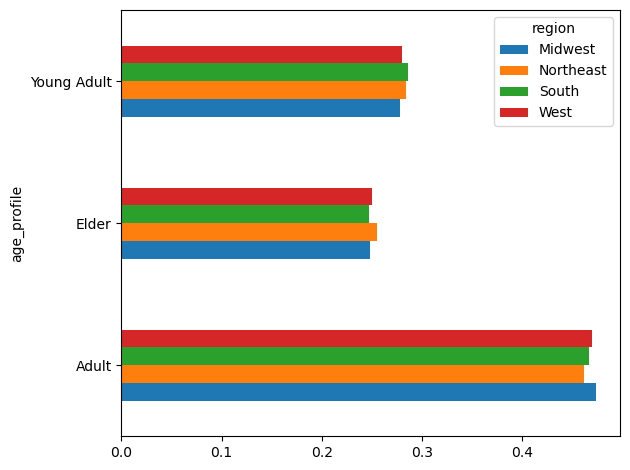

In [188]:
# age_profile by region

age_region_bar = crosstab_age_region.plot.barh()
plt.tight_layout()

In [189]:
# export age_region_bar

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

## Income

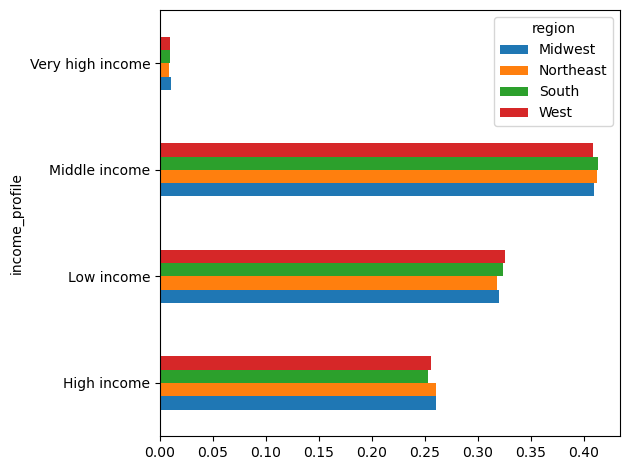

In [190]:
# income_profile by region

income_region_bar = crosstab_income_region.plot.barh()
plt.tight_layout()

In [191]:
# export income_region_bar

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

## Department

## Vegans / Non-vegans

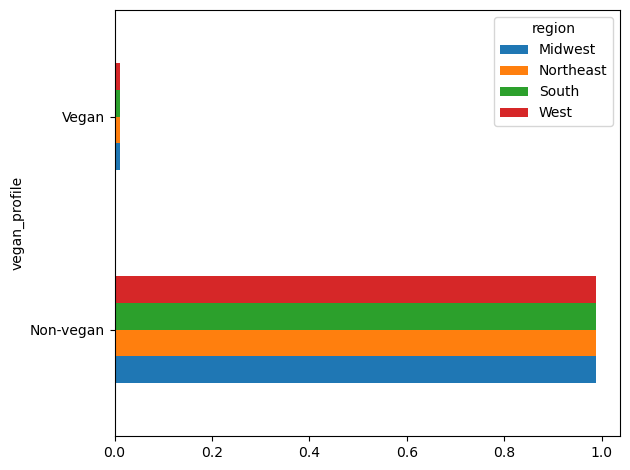

In [192]:
# Vegan_profile by region

vegan_region_bar = crosstab_vegan_region.plot.barh()
plt.tight_layout()

In [193]:
# export vegan_region_bar

vegan_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_region_bar.png'))

## Pet owners / Non-pet owners

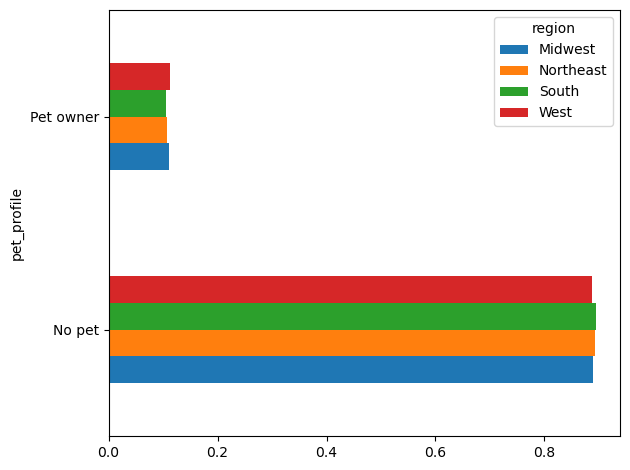

In [194]:
# pet_profile by region

pet_region_bar = crosstab_pet_region.plot.barh()
plt.tight_layout()

In [195]:
# export pet_region_bar

pet_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_region_bar.png'))

## New parent / Non-new parent

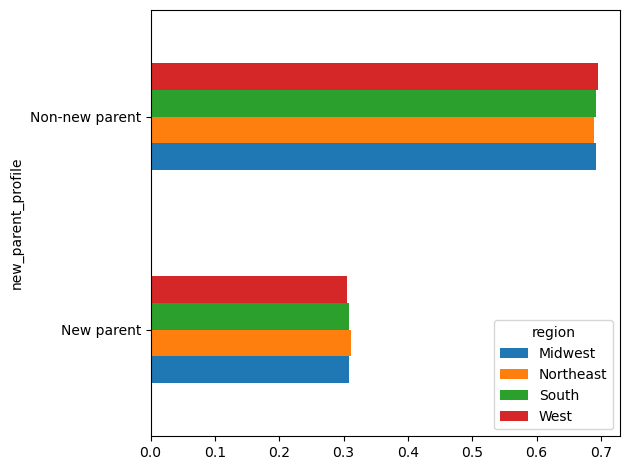

In [196]:
# new_parent_profile by region

new_parent_region_bar = crosstab_new_parent_region.plot.barh()
plt.tight_layout()

In [197]:
# export new_parent_region_bar

new_parent_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_parent_region_bar.png'))

## Family status

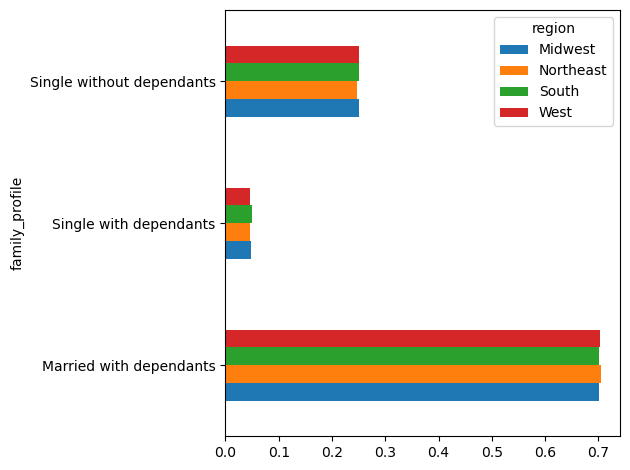

In [198]:
# family_profile by region

family_region_bar = crosstab_family_region.plot.barh()
plt.tight_layout()

In [199]:
# export family_region_bar

family_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_region_bar.png'))

## Shopping tendencies by day of week and age group

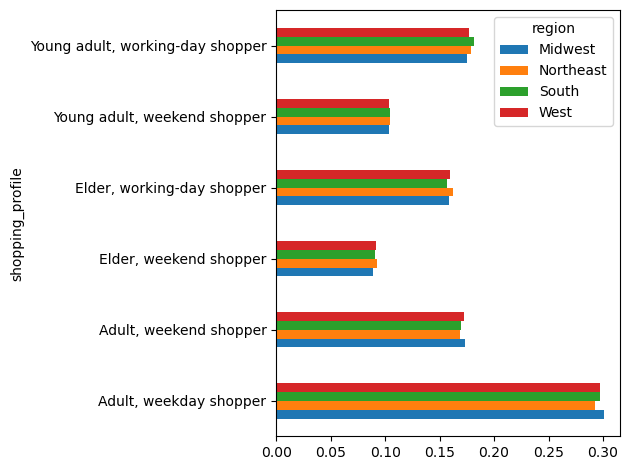

In [200]:
# shopping_profile by region

shopping_dow_age_region_bar = crosstab_shopping_dow_age_region.plot.barh()
plt.tight_layout()

In [201]:
# export shopping_dow_age_region_bar

shopping_dow_age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopping_dow_age_region_bar.png'))

## Shopping tendencies by day of week and family profile

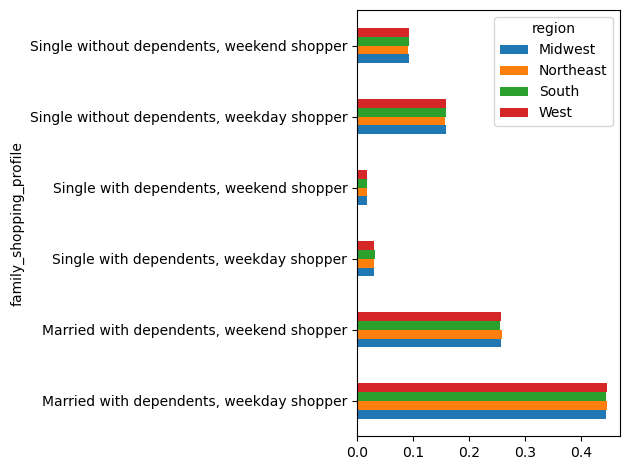

In [202]:
# family_shopping_profile by region

family_shopping_region_bar = crosstab_family_shopping_region.plot.barh()
plt.tight_layout()

In [203]:
# export family_shopping_profile by region

family_shopping_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_shopping_region_bar.png'))

## Shopping tendencies by parts of day and age profile

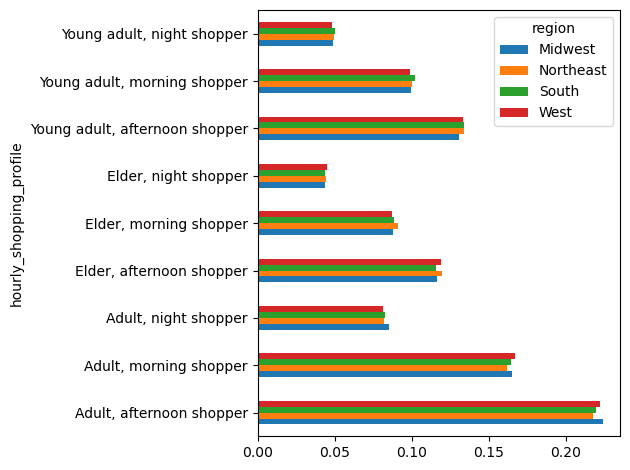

In [245]:
# hourly_shopping_profile by region

hourly_shopping_region_bar = crosstab_hourly_shopping_region.plot.barh()
plt.tight_layout()

In [248]:
# export hourly_shopping_profile by region

hourly_shopping_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_shopping_region_bar.png'))

## Visualizations for customer profiles by department

## Age

In [206]:
# create new crosstab so departments will be positioned on the x-axis

crosstab_2_age_department = pd.crosstab(df['department_id'], df['age_profile'])

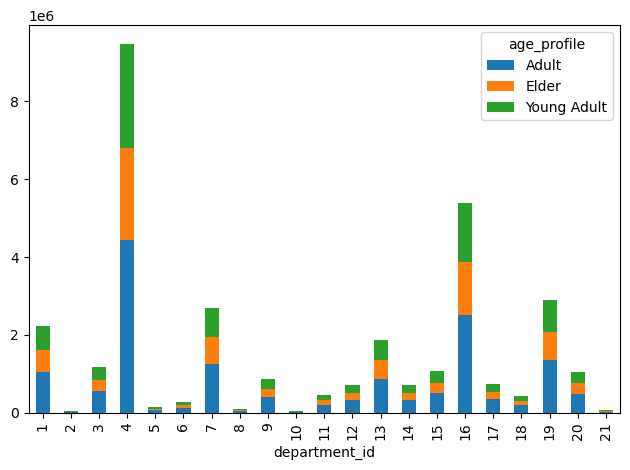

In [207]:
# create a stacked bar chart of the crosstab_2_age_department

age_department_bar = crosstab_2_age_department.plot.bar(stacked = True)
plt.tight_layout()

In [208]:
# export age_department_stacked_bar

age_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_stacked_bar.png'))

## Income

In [209]:
# create new crosstab so departments will be positioned on the x-axis

crosstab_2_income_department = pd.crosstab(df['department_id'], df['income_profile'])

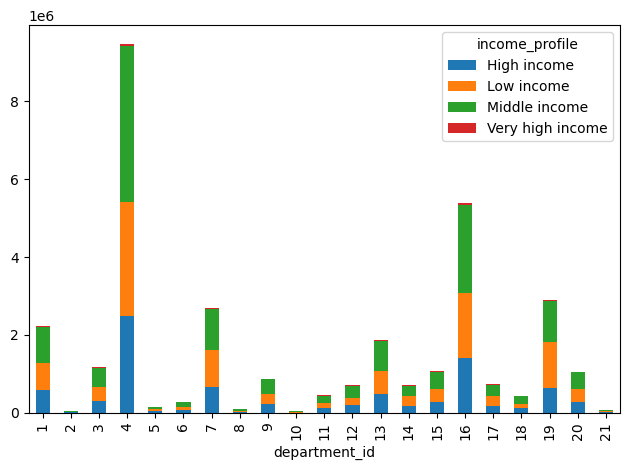

In [210]:
# create a stacked bar chart of the crosstab_2_income_department

income_department_bar = crosstab_2_income_department.plot.bar(stacked = True)
plt.tight_layout()

In [211]:
# export income_department_stacked_bar

income_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_stacked_bar.png'))

## Department

## Vegans / Non-vegans

In [212]:
# create new crosstab so departments will be positioned on the x-axis

crosstab_2_vegan_department = pd.crosstab(df['department_id'], df['vegan_profile'])

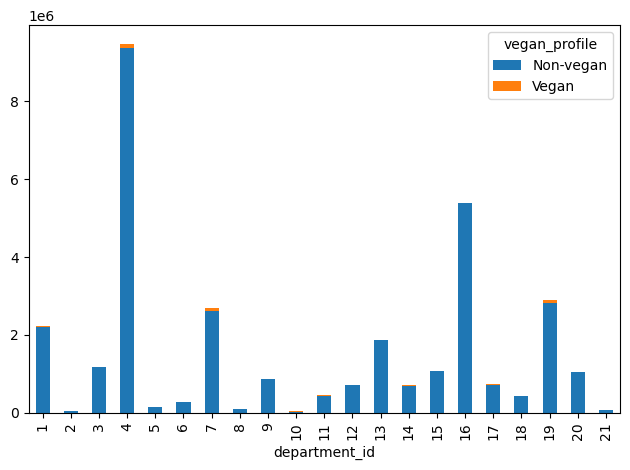

In [213]:
# create a stacked bar chart of the crosstab_2_vegan_department

vegan_department_bar = crosstab_2_vegan_department.plot.bar(stacked = True)
plt.tight_layout()

In [214]:
# export vegan_department_stacked_bar

vegan_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_department_stacked_bar.png'))

## Pet owners / Non-pet owners

In [215]:
# create new crosstab so departments will be positioned on the x-axis

crosstab_2_pet_department = pd.crosstab(df['department_id'], df['pet_profile'])

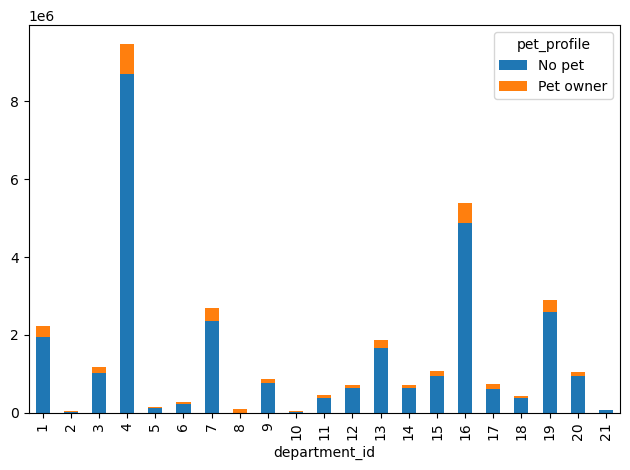

In [216]:
# create a stacked bar chart of the crosstab_2_pet_department

pet_department_bar = crosstab_2_pet_department.plot.bar(stacked = True)
plt.tight_layout()

In [217]:
# export pet_department_stacked_bar

pet_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_department_stacked_bar.png'))

## New parent / Non-new parent

In [218]:
# create new crosstab so departments will be positioned on the x-axis

crosstab_2_new_parent_department = pd.crosstab(df['department_id'], df['new_parent_profile'])

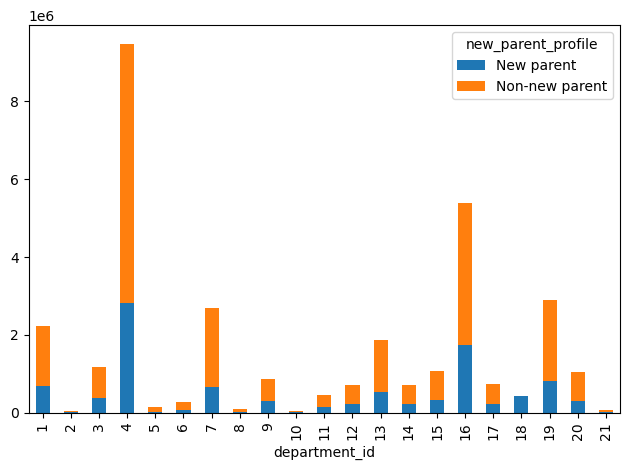

In [219]:
# create a stacked bar chart of the crosstab_2_new_parent_department

new_parent_department_bar = crosstab_2_new_parent_department.plot.bar(stacked = True)
plt.tight_layout()

In [220]:
# export new_parent_department_stacked_bar

new_parent_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_parent_department_stacked_bar.png'))

## Family status

In [221]:
# create new crosstab so departments will be positioned on the x-axis

crosstab_2_family_department = pd.crosstab(df['department_id'], df['family_profile'])

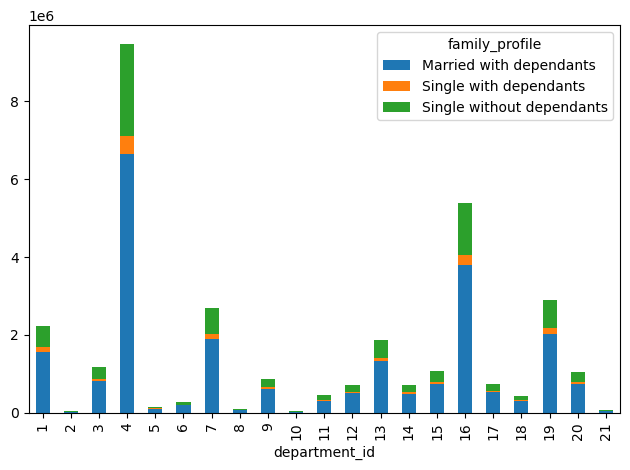

In [222]:
# create a stacked bar chart of the crosstab_2_family_department

family_department_bar = crosstab_2_family_department.plot.bar(stacked = True)
plt.tight_layout()

In [223]:
# export family_department_stacked_bar

family_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_department_stacked_bar.png'))

## Shopping tendencies by day of week and age group

In [224]:
# create new crosstab so departments will be positioned on the x-axis

crosstab_2_shopping_department = pd.crosstab(df['department_id'], df['shopping_profile'])

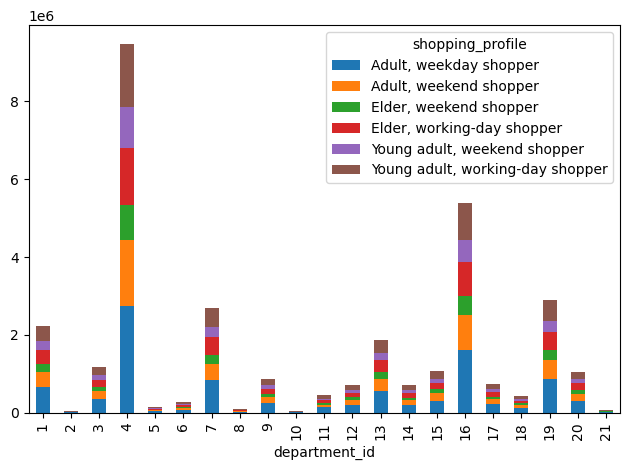

In [225]:
# create a stacked bar chart of the crosstab_2_shopping_department

shopping_department_bar = crosstab_2_shopping_department.plot.bar(stacked = True)
plt.tight_layout()

In [226]:
# export shopping_department_stacked_bar

shopping_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopping_department_stacked_bar.png'))

## Shopping tendencies by day of week and family profile

In [227]:
# create new crosstab so departments will be positioned on the x-axis

crosstab_2_family_shopping_department = pd.crosstab(df['department_id'], df['family_shopping_profile'])

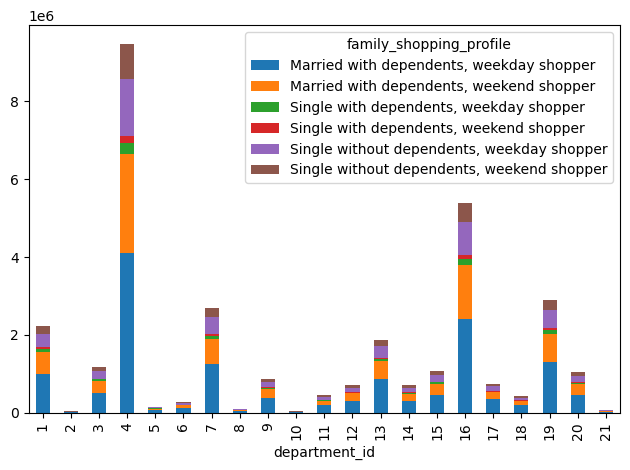

In [228]:
# create a stacked bar chart of the crosstab_2_family_shopping_department

family_shopping_department_bar = crosstab_2_family_shopping_department.plot.bar(stacked = True)
plt.tight_layout()

In [229]:
# export family_shopping_department_stacked_bar

family_shopping_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_shopping_department_stacked_bar.png'))

## Shopping tendencies by parts of day and age profile

In [230]:
# create new crosstab so departments will be positioned on the x-axis

crosstab_2_hourly_shopping_department = pd.crosstab(df['department_id'], df['hourly_shopping_profile'])

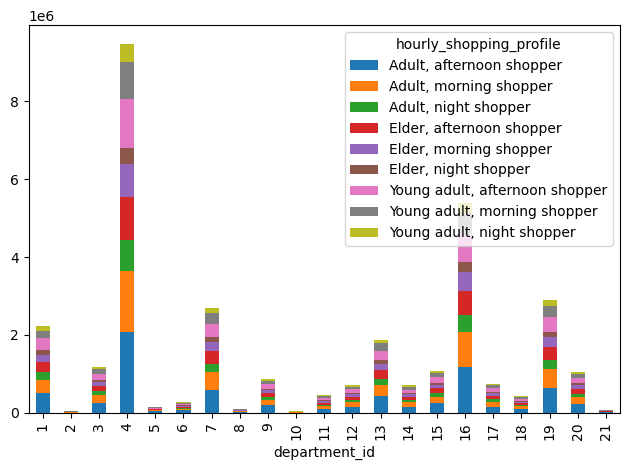

In [231]:
# create a stacked bar chart of the crosstab_2_hourly_shopping_department

hourly_shopping_department_bar = crosstab_2_hourly_shopping_department.plot.bar(stacked = True)
plt.tight_layout()

In [232]:
# export hourly_shopping_department_stacked_bar

hourly_shopping_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_shopping_department_stacked_bar.png'))

# 13. Further analasys to answer other project questions

## Ordering habits based on loyalty status

In [233]:
# create crosstab between 'department_id' and 'loyalty_flag'

crosstab_department_loyalty = pd.crosstab(df['department_id'], df['loyalty_flag'], normalize = 'index')

In [234]:
# check output

crosstab_department_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,0.272720,0.217154,0.510126
2,0.295252,0.212697,0.492050
3,0.324005,0.190804,0.485191
4,0.332027,0.183202,0.484772
5,0.251945,0.245276,0.502778
6,0.291154,0.212079,0.496767
7,0.318072,0.190791,0.491136
8,0.260643,0.210160,0.529197
9,0.279913,0.218464,0.501623


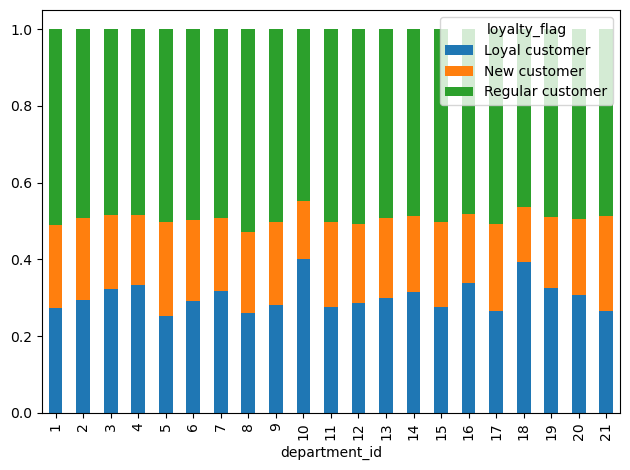

In [235]:
# create a stacked bar chart of the crosstab_department_loyalty

department_loyalty_bar = crosstab_department_loyalty.plot.bar(stacked = True)
plt.tight_layout()

In [236]:
# export department_loyalty_bar

department_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_loyalty_stacked_bar.png'))

## Ordering habits based on a customer's region

In [237]:
# create crosstab between 'department_id' and 'region'

crosstab_department_region = pd.crosstab(df['department_id'], df['region'], normalize = 'index')

In [238]:
# check output

crosstab_department_region

region,Midwest,Northeast,South,West
department_id,,,,
1,0.234522,0.174927,0.334669,0.255881
2,0.232013,0.181450,0.336502,0.250034
3,0.233591,0.177921,0.331632,0.256856
4,0.235032,0.175735,0.333416,0.255817
5,0.235439,0.172692,0.335884,0.255986
6,0.236714,0.174152,0.331072,0.258062
7,0.232718,0.179835,0.334412,0.253036
8,0.228775,0.190358,0.319999,0.260868
9,0.235129,0.175180,0.331681,0.258010


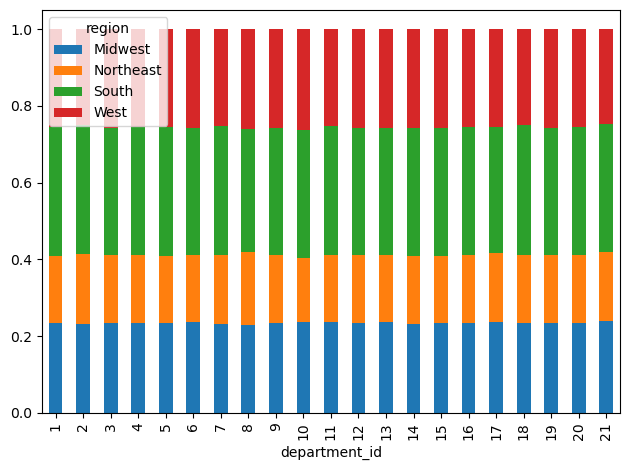

In [239]:
# create a stacked bar chart of the crosstab_department_region

department_region_bar = crosstab_department_region.plot.bar(stacked = True)
plt.tight_layout()

In [240]:
# export department_region_bar

department_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_region_stacked_bar.png'))

## Most popular products

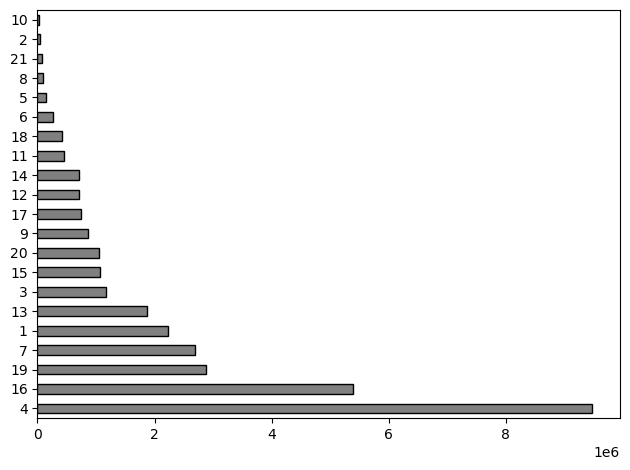

In [241]:
# create bar chart for 'departmet_id'

department_id_bar = df['department_id'].value_counts(dropna = False).plot.barh(color = ['grey'], ec = 'black')
plt.tight_layout()

In [242]:
# export department_id_bar

department_id_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_id_bar.png'))

# 14. Exporting final data set

In [243]:
# export final data set

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_final.pkl'))